## Load libraries

In [1]:
# Libraries to work cross-platform
import os

# Libraries to work with dataset
import pandas as pd
import numpy as np

# Library to create embeddings
import nltk
from gensim.models.keyedvectors import KeyedVectors
import spacy

# Libraries to visualize data
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
# import matplotlib.cm as cm

# Libraries for monitoring operation process
from tqdm import tqdm     # displaying progress bar while running computation

# !python -m spacy download en_core_web_lg

## Configurate and declare global variables

In [2]:
os_name = os.name

if os_name == 'nt':
    BASE_DIR = "E:/THIENDHB_GOOGLEDRIVE/MASTER TILBURG/THESIS/"
    INPUT_DIR = BASE_DIR + "DATASET/INPUT/"
    OUTPUT_DIR = BASE_DIR + "DATASET/OUTPUT/"
elif os_name == 'posix':
    BASE_DIR = "/media/pinkalinux/WORK/THIENDHB_GOOGLEDRIVE/MASTER TILBURG/THESIS/"
    INPUT_DIR = BASE_DIR + "DATASET/INPUT/"
    OUTPUT_DIR = BASE_DIR + "DATASET/OUTPUT/"

SEED = 6886

%matplotlib inline

## Import data

In [3]:
# Load clean job title dataset from file
job_df = pd.read_csv(OUTPUT_DIR + "clean_title_df.csv")
job_df

,job_title
0,chief financial officer
1,full time community connection intern pay inte...
2,country coordinator
3,bcc specialist
4,software developer
...,...
18987,senior creative ux ui designer
18988,category development manager
18989,operational marketing manager
18990,head online sale department


In [4]:
raw_job_df = pd.read_csv(INPUT_DIR + "refined_jobpost_data.csv", usecols=['job_title'])
raw_job_df

,job_title
0,Chief Financial Officer
1,Full-time Community Connections Intern (paid i...
2,Country Coordinator
3,BCC Specialist
4,Software Developer
...,...
18987,Senior Creative UX/ UI Designer
18988,Category Development Manager
18989,Operational Marketing Manager
18990,Head of Online Sales Department


## Create embeddings

In [5]:
def create_vocab_list(df, col):
    vocab = []
    for doc in tqdm(df[col]):
        words = [word for word in nltk.word_tokenize(str(doc))]
        vocab.extend(words)

    return vocab

In [6]:
tqdm.pandas(desc="Creating Job Title Corpus")
full_vocab_list = create_vocab_list(job_df, 'job_title')

100%|█████████████████████████████████████████████████████████████████████████| 18992/18992 [00:01<00:00, 12430.96it/s]


In [7]:
print(len(full_vocab_list))
full_vocab_list[:10]

56353


['chief',
 'financial',
 'officer',
 'full',
 'time',
 'community',
 'connection',
 'intern',
 'pay',
 'internship']

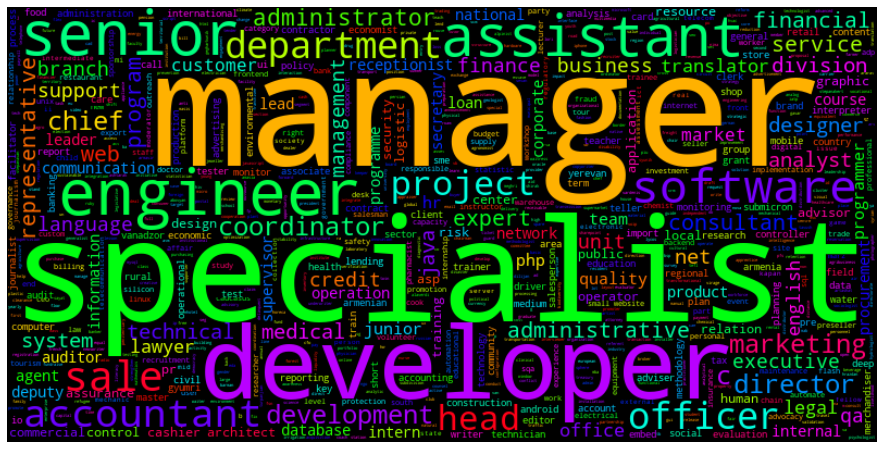

In [8]:
# Visualize the vocabulary list in Word Cloud

# Create a WordCloud object
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="black",
    max_words=10000,
    #     min_font_size=9,
    #     max_font_size=80,
    prefer_horizontal=0.95,
    repeat=False,
    collocations=False,  # whether to include collocations (bigrams) of two words
    colormap=sns.color_palette("hsv", as_cmap=True),
    random_state=SEED,
)

# Generate a word cloud
wordcloud.generate(",".join(full_vocab_list))

# Visualize the word cloud
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [9]:
vocab_list = list(set(full_vocab_list))
print(len(vocab_list))
vocab_list[:10]

2617


['game',
 'investigative',
 'governance',
 'ultrasound',
 'involver',
 'node',
 'toshiba',
 'preparation',
 'steward',
 'aparan']

In [10]:
# load the Stanford GloVe model in Word2Vec format
# pre_model = KeyedVectors.load_word2vec_format(INPUT_DIR + "w2v_from_glove.6B.100d.txt")

In [11]:
# model_vocab = pre_model.index_to_key

In [12]:
# load the pre-trained Stanford GloVe model in Word2Vec format (dimension 300)
pre_model = spacy.load('en_core_web_lg')

In [13]:
# model_corpus = pre_model(" ".join(vocab_list))

In [14]:
# model_vocab = [t.text for t in model_corpus]
# type(model_vocab), len(model_vocab), model_vocab[:10]
model_vocab = list(pre_model.vocab.strings)
type(model_vocab), len(model_vocab), model_vocab[:10]

(list,
 701570,
 ['\t', 'en', '\n', ' ', "'", "''", '"', "'Cause", 'because', "'cause"])

In [15]:
out_of_vocab = [token for token in vocab_list if token not in model_vocab]
print(len(out_of_vocab))
out_of_vocab[:20]

213


['involver',
 'aparan',
 'ashtarak',
 'kajaran',
 'srsg',
 'srtuctural',
 'fishfarm',
 'kumayri',
 'srecialist',
 'airticket',
 'transactons',
 'feldsher',
 'aragatsotn',
 'assistat',
 'hrazdan',
 'gyumri',
 'astp',
 'wostayn',
 'aygavan',
 'vayots']

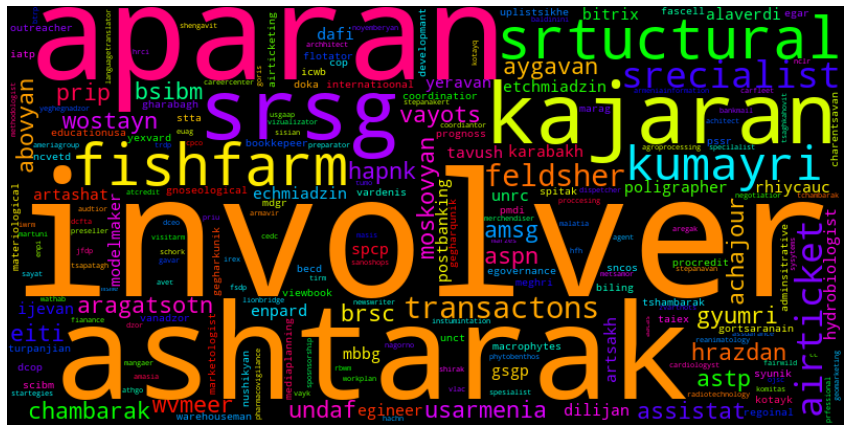

In [16]:
# Generate a word cloud
wordcloud.generate(",".join(out_of_vocab))

# Visualize the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [17]:
def create_corpus(df, col):

    corpus = []
    process_col = tqdm(df[col])
    process_col.set_description(desc="Creating corpus")

    for doc in process_col:
        words = [word for word in nltk.word_tokenize(str(doc))]
        corpus.append(words)

    return corpus

In [18]:
title_docs = create_corpus(job_df, 'job_title')
title_docs[:5]

Creating corpus: 100%|████████████████████████████████████████████████████████| 18992/18992 [00:01<00:00, 11976.43it/s]


[['chief', 'financial', 'officer'],
 ['full', 'time', 'community', 'connection', 'intern', 'pay', 'internship'],
 ['country', 'coordinator'],
 ['bcc', 'specialist'],
 ['software', 'developer']]

In [19]:
# vector_size = model_corpus[0].vector.shape
# vector_size

In [20]:
# Extract word embeddings from Spacy model
vector_list = []
word_list = []
for token in tqdm(vocab_list):
    if token in model_vocab:
        word_emb = pre_model(token)
        vector_list.append(word_emb.vector)
        word_list.append(token)
    else:
        continue

100%|█████████████████████████████████████████████████████████████████████████████| 2617/2617 [00:18<00:00, 144.99it/s]


In [21]:
# Store word embeddings in Gensim keyed vectors
vector_size = len(vector_list[0])
print(vector_size)

kv = KeyedVectors(vector_size=vector_size)
kv.add_vectors(keys=word_list, weights=vector_list)

300


In [22]:
# Save Gensim keyed vectors to file
kv.save(OUTPUT_DIR + 'title_word_vectors.kv')

In [23]:
# Normalize vectors
kv.fill_norms(force=True)

# Save normalized keyed vectors to file
kv.save(OUTPUT_DIR + 'title_word_norm_vectors.kv')

In [24]:
def vectorize(doc_list, kv, vector_size):
    """Generate vectors for list of documents using a Word Embedding

    Args:
        doc_list: List of documents
        kv: GloVe's Word Embedding in Gensim Keyed Vectors format
        vector_size: dimension of 1 word embedding

    Returns:
        List of document vectors (mean of word vectors)
    """
    features = []

    process_doc_list = tqdm(doc_list)
    process_doc_list.set_description(desc="Creating document embeddings")

    for tokens in process_doc_list:
        zero_vector = np.zeros(vector_size)
        vectors = []
        for token in tokens:
            if kv.has_index_for(token):
                vectors.append(kv.get_vector(token))
            else:
                continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features

In [27]:
title_embeddings = vectorize(title_docs, kv, vector_size)
print(len(title_embeddings), len(title_embeddings[0]))
np.asarray(title_embeddings)[:1, :20]

Creating document embeddings: 100%|███████████████████████████████████████████| 18992/18992 [00:00<00:00, 48176.01it/s]

18992 300


array([[-0.45085335,  0.17004667,  0.170931  ,  0.13105367, -0.11325833,
        -0.137706  , -0.17120433, -0.10623666,  0.01349   ,  3.52916646,
        -0.48028541, -0.363938  ,  0.34913   , -0.23519333, -0.30546334,
        -0.43363571, -0.05779101,  0.33923998,  0.20500666,  0.10366999]])

In [28]:
# Save embeddings file in numpy format
title_embeddings_outfile = OUTPUT_DIR + "title_embeddings"
np.save(title_embeddings_outfile, title_embeddings)

# Save job title tokens in file
title_docs_outfile = OUTPUT_DIR + "title_docs.csv"
df = raw_job_df.copy(deep=True)
df["clean_job_title"] = pd.Series(title_docs)
pd.DataFrame(data=df).to_csv(title_docs_outfile, index=False)